# Exercise 2
MG Becongco <br>
Fundamentals of Machine Learning <br>
Correlation

In [1]:
import seaborn as sns  
import pandas as pd  
import matplotlib.pyplot as plt  

import warnings
warnings.filterwarnings("ignore")


df1 = pd.read_csv("survey.csv")
df2 = pd.read_csv("steps.csv", delimiter=";")
df = pd.merge(df1, df2, on = 'id')  # merge data

In [2]:
# cleanup data
df3 = pd.melt(df,id_vars=["id","city","gender","age","hh_size","education","education_1","height","weight"],
        var_name="Date", value_name="Steps")  # Transpose Steps data into columns date and steps
df3 = df3.drop(df3[df3.Steps > 100000].index) # Remove impossible values
df3 = df3.reset_index(drop=True)              # reset index
df3 = df3.dropna()                            #drop NaN values 
df3['Steps']=df3['Steps'].astype(int)         # Ensure that steps data is an integer value
df3.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,Date,Steps
25,26,Lille,Male,35-44,4,4,High school,185.0,140.0,20-6-2013,164
95,96,Bordeaux,Female,25-34,3,5,Master or doctorate,161.0,52.0,20-6-2013,6060
109,110,Bordeaux,Female,45-54,4,4,Bachelor,157.0,69.0,20-6-2013,250
203,204,Lille,Male,45-54,2,2,Master or doctorate,175.0,66.0,20-6-2013,6060
205,206,Lille,Female,<25,2,2,High school,163.0,74.0,20-6-2013,250


Exploratory data analysis below: <br>
Create the DataFrame containing mean steps per participant

In [3]:
df3_byID = df3[["id", "Steps"]]  #subset containing ID and Steps
df3_gender = df3[["id","gender","age","education_1"]]  #subet containing ID, gender and age to be merged later
part_series = df3_byID.groupby(by="id").mean()   #compute for mean per participant
part_df = pd.DataFrame(part_series)              # create the dataframe
part_df_merge = pd.merge(part_df, df3_gender, on = 'id')  # merge data
part_df_merge.drop_duplicates(inplace = True)   # drop duplicates
part_df_merge = part_df_merge.reset_index()     # reset index
part_df_merge.rename(columns={'id': 'Participant','Steps': 'Mean Steps'}, inplace=True)   # rename columns

An analysis of mean steps per participant: <br>
Graphs of the distribution below: LinePlot (e.g., histogram, box plot, density plot, violin plot) <br>

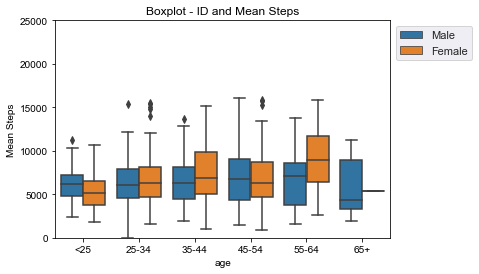

In [4]:
# mean steps per participant --> Graph of the distribution: BoxPlot
a = sns.boxplot(x="age", y="Mean Steps", hue="gender", order=["<25","25-34","35-44","45-54","55-64","65+"], data=part_df_merge)
a = (a.set(ylim=(0,25000)))
sns.set(rc={"figure.figsize":(13, 9)}) 
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Boxplot - ID and Mean Steps')
plt.show(a)

Boxplot shows the following:<br> 
1. Females in the age of 55-64 has a mean steps higher than the rest of the age groups and gender. Though there are some outliers in the Female age group of 24-34 that has mean steps as high as the females in age group 55-64 <br>
2. Ages "<25" has mean steps that are much similar to both gender with male median steps higher than the female median steps. <br>

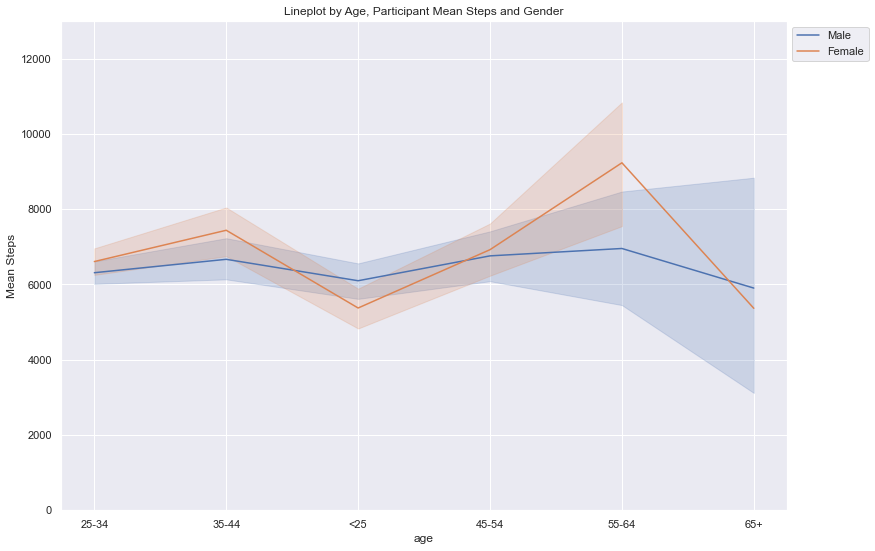

In [5]:
# lineplot
#d = sns.lineplot(x="age", y="Steps",hue="gender", style="education_1", data=df3)
b = sns.lineplot(x="age", y="Mean Steps",hue="gender", data=part_df_merge)
b = (b.set(ylim=(0,13000)))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Lineplot by Age, Participant Mean Steps and Gender')
plt.show(b)

Lineplot indicates that the participants in the female group in the age group of "55-64" has the highest mean steps, and the lowest mean steps at the "<25" age group. The mean steps for all the groups are in between 4000 and 10000 steps. 

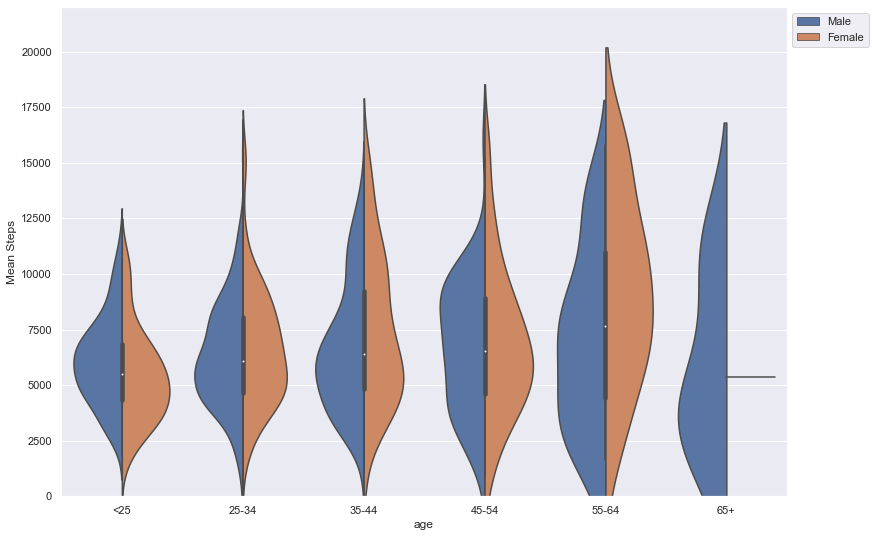

In [6]:
# violin plot
d = sns.violinplot(data=part_df_merge, x="age", y="Mean Steps", hue="gender",split=True, linewidth=1.5, order=["<25","25-34","35-44","45-54","55-64","65+"])
d =(d.set(ylim=(0,22000)))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show(d)

The median of the median steps for age group 55-64 is the highest among all age groups. <br>
The distribution of the mean steps for the all the age group indicates that values are highly concentrated around the median.

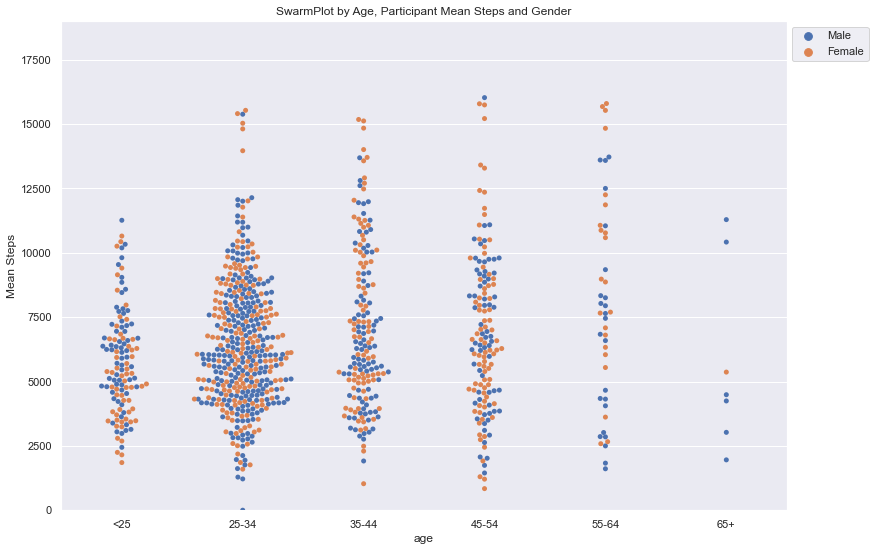

In [7]:
e = sns.swarmplot(x="age", y="Mean Steps", hue="gender", order=["<25","25-34","35-44","45-54","55-64","65+"], size=5, data=part_df_merge)
e = (e.set(ylim=(0,19000)))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('SwarmPlot by Age, Participant Mean Steps and Gender')
plt.show(e)

Participants mean steps data is highly concentrated for the age group 25-34 indicating high participation in that age group. Less participation seen for age group 65+ and the highest value of mean steps can be seen in age group 55-64.

No handles with labels found to put in legend.


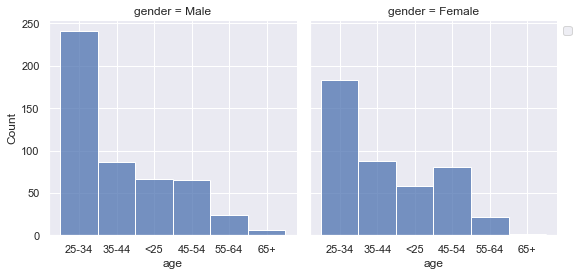

In [8]:
# distribution plot for dataframe of user participants mean steps
sns.displot(part_df_merge, x="age", col="gender", binwidth=3, height=4, facet_kws=dict(margin_titles=True), )
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

No handles with labels found to put in legend.


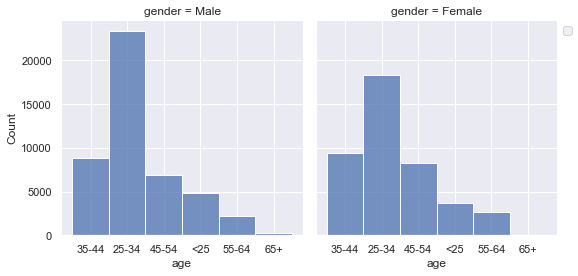

In [9]:
# distribution plot of df3 all data
sns.displot(df3, x="age", col="gender", binwidth=3, height=4, facet_kws=dict(margin_titles=True), )
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

There are more participants the 25-34 age groups for both genders. 

Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)


In [10]:
#Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
print('Mean Steps of all data: '+str(df3.loc[:,"Steps"].mean()))
print('Median Steps of all data: '+str(df3.loc[:,"Steps"].median()))  
print('Standard Deviation Steps  of all data: '+str(df3.loc[:,"Steps"].std())) 
print('\nMean Steps of Participants Mean Steps: '+str(part_df_merge.loc[:,"Mean Steps"].mean()))
print('Median Steps of Participants Mean Steps: '+str(part_df_merge.loc[:,"Mean Steps"].median()))  
print('Standard Deviation of Participants Mean Steps: '+str(part_df_merge.loc[:,"Mean Steps"].std())) 

Mean Steps of all data: 7836.229221101
Median Steps of all data: 6981.0
Standard Deviation Steps  of all data: 5557.116882737111

Mean Steps of Participants Mean Steps: 6607.057416966428
Median Steps of Participants Mean Steps: 6212.744249241658
Standard Deviation of Participants Mean Steps: 2798.833355347756


Data distribution for tends to cluster in the median for all of the age groups regardles of gender. The age group 25-34 has the most participants. Though there are some outliers for groups up to 54. 

The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)


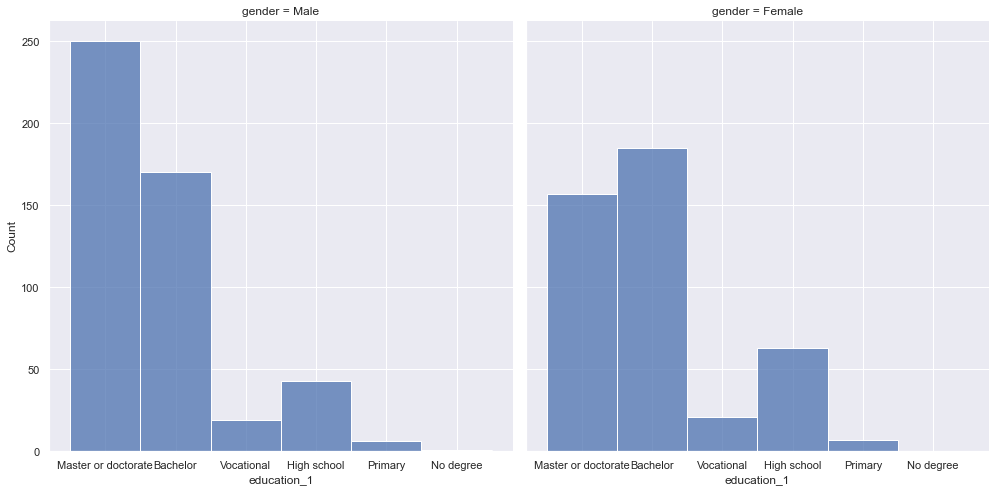

In [11]:
# distribution plot of Mean steps with reference to education and gender
sns.displot(part_df_merge, x="education_1", col="gender", binwidth=3, height=7, facet_kws=dict(margin_titles=True), )
#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

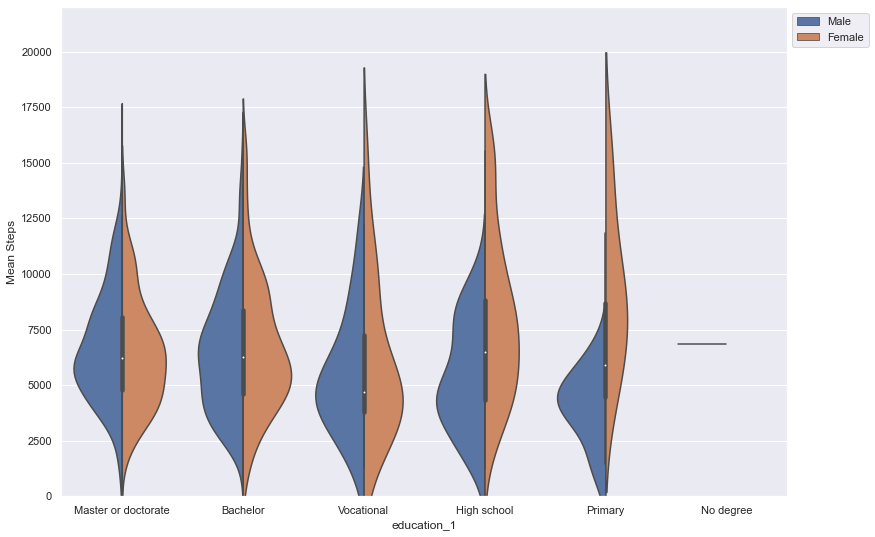

In [12]:
# violin plot of Mean steps with reference to education and gender
d = sns.violinplot(data=part_df_merge, x="education_1", y="Mean Steps", hue="gender",split=True, linewidth=1.5)
d =(d.set(ylim=(0,22000)))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show(d)

Highest user participation with Masters or Doctorate group for males, and bachelors for female. Data mostly congregate near the median except for the Primary education group. 

#Correlation <br>
(Start of exercise 2) <br>
Scatterplot matrix of the numerical variables <br>


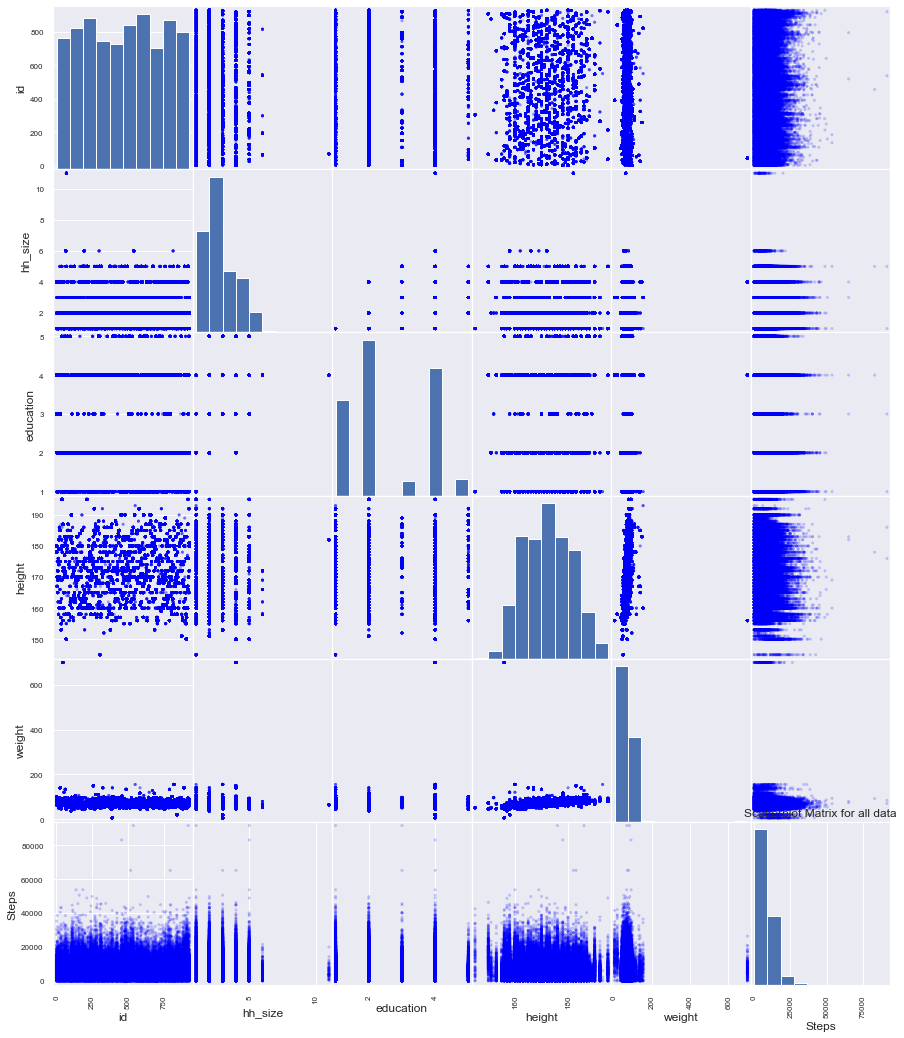

In [22]:
pd.plotting.scatter_matrix(df3, color='blue', diagonal='hist', figsize=(15,18), alpha=0.2, grid=True)
plt.title('Scatterplot Matrix for all data')
plt.show()

Correlation matrix of the numerical variables <br>


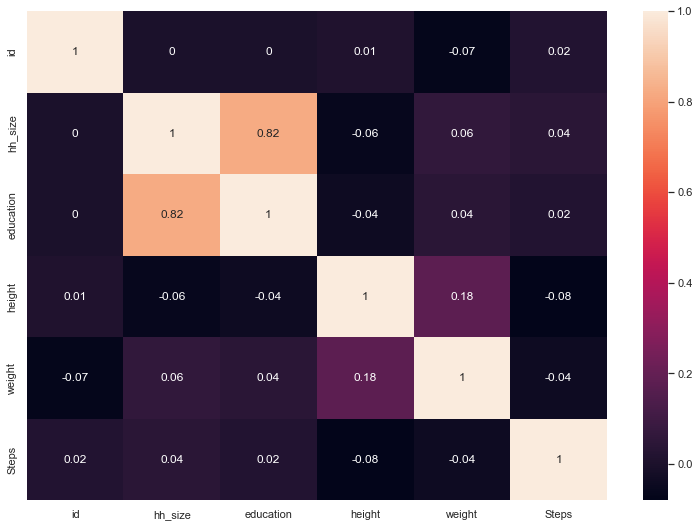

In [25]:
df3_corr_matrix = df3.corr().round(2)  #correlation matrix of the whole dataset df3
sns.heatmap(df3_corr_matrix, annot=True)
plt.show()

In [26]:
print('Matrix correlation of whole dataset')
df3_matrix=df3.corr()
df3_matrix=df3_matrix.unstack()
df3_matrix=df3_matrix[df3_matrix >0]
print(df3_matrix)

Matrix correlation of whole dataset
id         id           1.000000
           hh_size      0.003999
           education    0.001250
           height       0.013547
           Steps        0.022801
hh_size    id           0.003999
           hh_size      1.000000
           education    0.822130
           weight       0.055819
           Steps        0.038140
education  id           0.001250
           hh_size      0.822130
           education    1.000000
           weight       0.041997
           Steps        0.016892
height     id           0.013547
           height       1.000000
           weight       0.178070
weight     hh_size      0.055819
           education    0.041997
           height       0.178070
           weight       1.000000
Steps      id           0.022801
           hh_size      0.038140
           education    0.016892
           Steps        1.000000
dtype: float64


Describe and interpret the results <br>
Matrix Correlation: Both figures above and the heatmap indicates a high correlation between "education" and "hh_size". All other variables has a weak relationship with "steps" variable.

In [18]:
from scipy.stats.stats import pearsonr # correlation function 
print("Pearson's Correlation Coefficient: Education vs. Steps ")
r, p = pearsonr(df3['education'],df3['Steps'])
print("The pearson correlation coefficient is:  "+ str(round(r,10)))
print("                        The p-value is:  "+ str("%.12f" % p))


Pearson's Correlation Coefficient: Education vs. Steps 
The pearson correlation coefficient is:  0.0168915557
                        The p-value is:  0.000000481274


Education and number of Steps taken by a participant has a weak relationship or is not strongly correlated. <br>
